In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, LeaveOneOut, cross_val_score
from sklearn.model_selection import cross_val_predict, cross_validate, KFold, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.gaussian_process.kernels import RationalQuadratic, RBF, Matern, DotProduct
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from joblib import dump, load
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.manifold import TSNE
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from plotfunc import plot_result, cross_validate_and_plot, plot_learning_curve, plot_with_err

import seaborn as sns

In [2]:
# cross validation:
lo = LeaveOneOut()

In [4]:
data = pd.read_csv('data_tc.csv')


In [5]:
columns =  ['Fe', 'Cr', 'Ni', 'Mo',
       'Mn', 'C', 'Ti', 'Si', 'Nb', 'V', 'P', 'B', 'Al', 'N', 'S', 'Co', 'Cu',
       'W', 'As',  'HT stage 1 temperature',
       'HT stage 1 duration', 'HT stage 1 cooling', 'HT stage 2 temperature', 
        'HT stage 2 duration', 'HT stage 2 cooling', 'VF FCC_A1#2', 'ND FCC_A1#2',
       'MR FCC_A1#2', 'VF HCP_A3#2', 'ND HCP_A3#2', 'MR HCP_A3#2',
       'VF M7C3_D101', 'ND M7C3_D101', 'MR M7C3_D101']

In [6]:
X = data[columns]
y = data['yeld strength']
X = np.array(X)
y = np.array(y)

# Lasso

In [9]:
steps = [('scaler', StandardScaler()), ('lasso', Lasso())]
pipeline = Pipeline(steps)

params = {
    'lasso__alpha':np.linspace(1e-5, 1e2, 100)
}

grid = GridSearchCV(pipeline, params, cv=lo.split(X), scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 39 folds for each of 100 candidates, totalling 3900 fits
[CV 1/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 1/39; 1/100] END ..lasso__alpha=1e-05;, score=-299775.947 total time=   0.0s
[CV 2/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 2/39; 1/100] END ...lasso__alpha=1e-05;, score=-49186.152 total time=   0.0s
[CV 3/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 3/39; 1/100] END ....lasso__alpha=1e-05;, score=-1500.616 total time=   0.0s
[CV 4/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 4/39; 1/100] END ....lasso__alpha=1e-05;, score=-5090.727 total time=   0.0s
[CV 5/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 5/39; 1/100] END ...lasso__alpha=1e-05;, score=-22201.717 total time=   0.0s
[CV 6/39; 1/100] START lasso__alpha=1e-05.......................................
[CV 6/39; 1/100] END ...lasso__alpha=1e-05;,

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.073e+04, tolerance: 1.107e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.973e+04, tolerance: 1.144e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

[CV 18/39; 2/100] END lasso__alpha=1.010110909090909;, score=-21201.215 total time=   0.0s
[CV 19/39; 2/100] START lasso__alpha=1.010110909090909..........................
[CV 19/39; 2/100] END lasso__alpha=1.010110909090909;, score=-5651.070 total time=   0.0s
[CV 20/39; 2/100] START lasso__alpha=1.010110909090909..........................
[CV 20/39; 2/100] END lasso__alpha=1.010110909090909;, score=-3082.365 total time=   0.0s
[CV 21/39; 2/100] START lasso__alpha=1.010110909090909..........................
[CV 21/39; 2/100] END lasso__alpha=1.010110909090909;, score=-13444.289 total time=   0.0s
[CV 22/39; 2/100] START lasso__alpha=1.010110909090909..........................
[CV 22/39; 2/100] END lasso__alpha=1.010110909090909;, score=-3164.392 total time=   0.0s
[CV 23/39; 2/100] START lasso__alpha=1.010110909090909..........................
[CV 23/39; 2/100] END lasso__alpha=1.010110909090909;, score=-8307.328 total time=   0.0s
[CV 24/39; 2/100] START lasso__alpha=1.01011090909090

[CV 1/39; 5/100] END lasso__alpha=4.040413636363636;, score=-42491.884 total time=   0.0s
[CV 2/39; 5/100] START lasso__alpha=4.040413636363636...........................
[CV 2/39; 5/100] END lasso__alpha=4.040413636363636;, score=-307.295 total time=   0.0s
[CV 3/39; 5/100] START lasso__alpha=4.040413636363636...........................
[CV 3/39; 5/100] END lasso__alpha=4.040413636363636;, score=-548.234 total time=   0.0s
[CV 4/39; 5/100] START lasso__alpha=4.040413636363636...........................
[CV 4/39; 5/100] END lasso__alpha=4.040413636363636;, score=-1093.189 total time=   0.0s
[CV 5/39; 5/100] START lasso__alpha=4.040413636363636...........................
[CV 5/39; 5/100] END lasso__alpha=4.040413636363636;, score=-7955.382 total time=   0.0s
[CV 6/39; 5/100] START lasso__alpha=4.040413636363636...........................
[CV 6/39; 5/100] END lasso__alpha=4.040413636363636;, score=-14511.214 total time=   0.0s
[CV 7/39; 5/100] START lasso__alpha=4.040413636363636........

[CV 23/39; 7/100] END lasso__alpha=6.060615454545454;, score=-10968.843 total time=   0.0s
[CV 24/39; 7/100] START lasso__alpha=6.060615454545454..........................
[CV 24/39; 7/100] END lasso__alpha=6.060615454545454;, score=-62172.677 total time=   0.0s
[CV 25/39; 7/100] START lasso__alpha=6.060615454545454..........................
[CV 25/39; 7/100] END lasso__alpha=6.060615454545454;, score=-131763.798 total time=   0.0s
[CV 26/39; 7/100] START lasso__alpha=6.060615454545454..........................
[CV 26/39; 7/100] END lasso__alpha=6.060615454545454;, score=-274.773 total time=   0.0s
[CV 27/39; 7/100] START lasso__alpha=6.060615454545454..........................
[CV 27/39; 7/100] END lasso__alpha=6.060615454545454;, score=-9481.855 total time=   0.0s
[CV 28/39; 7/100] START lasso__alpha=6.060615454545454..........................
[CV 28/39; 7/100] END lasso__alpha=6.060615454545454;, score=-81734.549 total time=   0.0s
[CV 29/39; 7/100] START lasso__alpha=6.060615454545

[CV 7/39; 10/100] END lasso__alpha=9.09091818181818;, score=-59285030.091 total time=   0.0s
[CV 8/39; 10/100] START lasso__alpha=9.09091818181818...........................
[CV 8/39; 10/100] END lasso__alpha=9.09091818181818;, score=-7532.928 total time=   0.0s
[CV 9/39; 10/100] START lasso__alpha=9.09091818181818...........................
[CV 9/39; 10/100] END lasso__alpha=9.09091818181818;, score=-5310.407 total time=   0.0s
[CV 10/39; 10/100] START lasso__alpha=9.09091818181818..........................
[CV 10/39; 10/100] END lasso__alpha=9.09091818181818;, score=-3333.829 total time=   0.0s
[CV 11/39; 10/100] START lasso__alpha=9.09091818181818..........................
[CV 11/39; 10/100] END lasso__alpha=9.09091818181818;, score=-4740.669 total time=   0.0s
[CV 12/39; 10/100] START lasso__alpha=9.09091818181818..........................
[CV 12/39; 10/100] END lasso__alpha=9.09091818181818;, score=-76.355 total time=   0.0s
[CV 13/39; 10/100] START lasso__alpha=9.09091818181818..

[CV 26/39; 12/100] END lasso__alpha=11.111119999999998;, score=-1423.365 total time=   0.0s
[CV 27/39; 12/100] START lasso__alpha=11.111119999999998........................
[CV 27/39; 12/100] END lasso__alpha=11.111119999999998;, score=-11539.992 total time=   0.0s
[CV 28/39; 12/100] START lasso__alpha=11.111119999999998........................
[CV 28/39; 12/100] END lasso__alpha=11.111119999999998;, score=-77360.761 total time=   0.0s
[CV 29/39; 12/100] START lasso__alpha=11.111119999999998........................
[CV 29/39; 12/100] END lasso__alpha=11.111119999999998;, score=-10656.906 total time=   0.0s
[CV 30/39; 12/100] START lasso__alpha=11.111119999999998........................
[CV 30/39; 12/100] END lasso__alpha=11.111119999999998;, score=-5777.555 total time=   0.0s
[CV 31/39; 12/100] START lasso__alpha=11.111119999999998........................
[CV 31/39; 12/100] END lasso__alpha=11.111119999999998;, score=-6278.336 total time=   0.0s
[CV 32/39; 12/100] START lasso__alpha=11

[CV 28/39; 14/100] END lasso__alpha=13.131321818181817;, score=-69470.366 total time=   0.0s
[CV 29/39; 14/100] START lasso__alpha=13.131321818181817........................
[CV 29/39; 14/100] END lasso__alpha=13.131321818181817;, score=-9237.326 total time=   0.0s
[CV 30/39; 14/100] START lasso__alpha=13.131321818181817........................
[CV 30/39; 14/100] END lasso__alpha=13.131321818181817;, score=-4840.174 total time=   0.0s
[CV 31/39; 14/100] START lasso__alpha=13.131321818181817........................
[CV 31/39; 14/100] END lasso__alpha=13.131321818181817;, score=-6930.571 total time=   0.0s
[CV 32/39; 14/100] START lasso__alpha=13.131321818181817........................
[CV 32/39; 14/100] END lasso__alpha=13.131321818181817;, score=-6285.364 total time=   0.0s
[CV 33/39; 14/100] START lasso__alpha=13.131321818181817........................
[CV 33/39; 14/100] END lasso__alpha=13.131321818181817;, score=-44468.261 total time=   0.0s
[CV 34/39; 14/100] START lasso__alpha=13.

[CV 32/39; 16/100] END lasso__alpha=15.151523636363635;, score=-7583.114 total time=   0.0s
[CV 33/39; 16/100] START lasso__alpha=15.151523636363635........................
[CV 33/39; 16/100] END lasso__alpha=15.151523636363635;, score=-48128.904 total time=   0.0s
[CV 34/39; 16/100] START lasso__alpha=15.151523636363635........................
[CV 34/39; 16/100] END lasso__alpha=15.151523636363635;, score=-2536.232 total time=   0.0s
[CV 35/39; 16/100] START lasso__alpha=15.151523636363635........................
[CV 35/39; 16/100] END lasso__alpha=15.151523636363635;, score=-10907.128 total time=   0.0s
[CV 36/39; 16/100] START lasso__alpha=15.151523636363635........................
[CV 36/39; 16/100] END lasso__alpha=15.151523636363635;, score=-2268.560 total time=   0.0s
[CV 37/39; 16/100] START lasso__alpha=15.151523636363635........................
[CV 37/39; 16/100] END lasso__alpha=15.151523636363635;, score=-5068.069 total time=   0.0s
[CV 38/39; 16/100] START lasso__alpha=15.

[CV 20/39; 19/100] END lasso__alpha=18.18182636363636;, score=-1080.917 total time=   0.0s
[CV 21/39; 19/100] START lasso__alpha=18.18182636363636.........................
[CV 21/39; 19/100] END lasso__alpha=18.18182636363636;, score=-8023.774 total time=   0.0s
[CV 22/39; 19/100] START lasso__alpha=18.18182636363636.........................
[CV 22/39; 19/100] END lasso__alpha=18.18182636363636;, score=-1209.672 total time=   0.0s
[CV 23/39; 19/100] START lasso__alpha=18.18182636363636.........................
[CV 23/39; 19/100] END lasso__alpha=18.18182636363636;, score=-3124.038 total time=   0.0s
[CV 24/39; 19/100] START lasso__alpha=18.18182636363636.........................
[CV 24/39; 19/100] END lasso__alpha=18.18182636363636;, score=-4105.125 total time=   0.0s
[CV 25/39; 19/100] START lasso__alpha=18.18182636363636.........................
[CV 25/39; 19/100] END lasso__alpha=18.18182636363636;, score=-111853.954 total time=   0.0s
[CV 26/39; 19/100] START lasso__alpha=18.181826

[CV 18/39; 22/100] END lasso__alpha=21.212129090909087;, score=-38224.573 total time=   0.0s
[CV 19/39; 22/100] START lasso__alpha=21.212129090909087........................
[CV 19/39; 22/100] END lasso__alpha=21.212129090909087;, score=-5124.981 total time=   0.0s
[CV 20/39; 22/100] START lasso__alpha=21.212129090909087........................
[CV 20/39; 22/100] END lasso__alpha=21.212129090909087;, score=-449.835 total time=   0.0s
[CV 21/39; 22/100] START lasso__alpha=21.212129090909087........................
[CV 21/39; 22/100] END lasso__alpha=21.212129090909087;, score=-9291.737 total time=   0.0s
[CV 22/39; 22/100] START lasso__alpha=21.212129090909087........................
[CV 22/39; 22/100] END lasso__alpha=21.212129090909087;, score=-2014.957 total time=   0.0s
[CV 23/39; 22/100] START lasso__alpha=21.212129090909087........................
[CV 23/39; 22/100] END lasso__alpha=21.212129090909087;, score=-2160.498 total time=   0.0s
[CV 24/39; 22/100] START lasso__alpha=21.21

[CV 1/39; 25/100] END lasso__alpha=24.242431818181817;, score=-9731.945 total time=   0.0s
[CV 2/39; 25/100] START lasso__alpha=24.242431818181817.........................
[CV 2/39; 25/100] END lasso__alpha=24.242431818181817;, score=-1152.859 total time=   0.0s
[CV 3/39; 25/100] START lasso__alpha=24.242431818181817.........................
[CV 3/39; 25/100] END lasso__alpha=24.242431818181817;, score=-9384.523 total time=   0.0s
[CV 4/39; 25/100] START lasso__alpha=24.242431818181817.........................
[CV 4/39; 25/100] END lasso__alpha=24.242431818181817;, score=-5680.441 total time=   0.0s
[CV 5/39; 25/100] START lasso__alpha=24.242431818181817.........................
[CV 5/39; 25/100] END lasso__alpha=24.242431818181817;, score=-1476.535 total time=   0.0s
[CV 6/39; 25/100] START lasso__alpha=24.242431818181817.........................
[CV 6/39; 25/100] END lasso__alpha=24.242431818181817;, score=-4032.323 total time=   0.0s
[CV 7/39; 25/100] START lasso__alpha=24.242431818

[CV 37/39; 27/100] END lasso__alpha=26.262633636363635;, score=-11069.886 total time=   0.0s
[CV 38/39; 27/100] START lasso__alpha=26.262633636363635........................
[CV 38/39; 27/100] END lasso__alpha=26.262633636363635;, score=-4290.529 total time=   0.0s
[CV 39/39; 27/100] START lasso__alpha=26.262633636363635........................
[CV 39/39; 27/100] END lasso__alpha=26.262633636363635;, score=-5183.150 total time=   0.0s
[CV 1/39; 28/100] START lasso__alpha=27.272734545454544.........................
[CV 1/39; 28/100] END lasso__alpha=27.272734545454544;, score=-9884.117 total time=   0.0s
[CV 2/39; 28/100] START lasso__alpha=27.272734545454544.........................
[CV 2/39; 28/100] END lasso__alpha=27.272734545454544;, score=-1587.475 total time=   0.0s
[CV 3/39; 28/100] START lasso__alpha=27.272734545454544.........................
[CV 3/39; 28/100] END lasso__alpha=27.272734545454544;, score=-9828.775 total time=   0.0s
[CV 4/39; 28/100] START lasso__alpha=27.27273

[CV 35/39; 30/100] END lasso__alpha=29.29293636363636;, score=-2809.975 total time=   0.0s
[CV 36/39; 30/100] START lasso__alpha=29.29293636363636.........................
[CV 36/39; 30/100] END lasso__alpha=29.29293636363636;, score=-7915.442 total time=   0.0s
[CV 37/39; 30/100] START lasso__alpha=29.29293636363636.........................
[CV 37/39; 30/100] END lasso__alpha=29.29293636363636;, score=-12306.802 total time=   0.0s
[CV 38/39; 30/100] START lasso__alpha=29.29293636363636.........................
[CV 38/39; 30/100] END lasso__alpha=29.29293636363636;, score=-4214.502 total time=   0.0s
[CV 39/39; 30/100] START lasso__alpha=29.29293636363636.........................
[CV 39/39; 30/100] END lasso__alpha=29.29293636363636;, score=-5724.088 total time=   0.0s
[CV 1/39; 31/100] START lasso__alpha=30.30303727272727..........................
[CV 1/39; 31/100] END lasso__alpha=30.30303727272727;, score=-10036.881 total time=   0.0s
[CV 2/39; 31/100] START lasso__alpha=30.30303727

[CV 10/39; 33/100] END lasso__alpha=32.32323909090909;, score=-13043.709 total time=   0.0s
[CV 11/39; 33/100] START lasso__alpha=32.32323909090909.........................
[CV 11/39; 33/100] END lasso__alpha=32.32323909090909;, score=-8559.930 total time=   0.0s
[CV 12/39; 33/100] START lasso__alpha=32.32323909090909.........................
[CV 12/39; 33/100] END lasso__alpha=32.32323909090909;, score=-551.942 total time=   0.0s
[CV 13/39; 33/100] START lasso__alpha=32.32323909090909.........................
[CV 13/39; 33/100] END lasso__alpha=32.32323909090909;, score=-5894.534 total time=   0.0s
[CV 14/39; 33/100] START lasso__alpha=32.32323909090909.........................
[CV 14/39; 33/100] END lasso__alpha=32.32323909090909;, score=-16767.163 total time=   0.0s
[CV 15/39; 33/100] START lasso__alpha=32.32323909090909.........................
[CV 15/39; 33/100] END lasso__alpha=32.32323909090909;, score=-103088.216 total time=   0.0s
[CV 16/39; 33/100] START lasso__alpha=32.32323

[CV 32/39; 35/100] END lasso__alpha=34.34344090909091;, score=-15259.738 total time=   0.0s
[CV 33/39; 35/100] START lasso__alpha=34.34344090909091.........................
[CV 33/39; 35/100] END lasso__alpha=34.34344090909091;, score=-69434.519 total time=   0.0s
[CV 34/39; 35/100] START lasso__alpha=34.34344090909091.........................
[CV 34/39; 35/100] END lasso__alpha=34.34344090909091;, score=-81.526 total time=   0.0s
[CV 35/39; 35/100] START lasso__alpha=34.34344090909091.........................
[CV 35/39; 35/100] END lasso__alpha=34.34344090909091;, score=-1283.893 total time=   0.0s
[CV 36/39; 35/100] START lasso__alpha=34.34344090909091.........................
[CV 36/39; 35/100] END lasso__alpha=34.34344090909091;, score=-9539.442 total time=   0.0s
[CV 37/39; 35/100] START lasso__alpha=34.34344090909091.........................
[CV 37/39; 35/100] END lasso__alpha=34.34344090909091;, score=-14525.485 total time=   0.0s
[CV 38/39; 35/100] START lasso__alpha=34.3434409

[CV 22/39; 38/100] END lasso__alpha=37.373743636363635;, score=-6556.075 total time=   0.0s
[CV 23/39; 38/100] START lasso__alpha=37.373743636363635........................
[CV 23/39; 38/100] END lasso__alpha=37.373743636363635;, score=-1049.142 total time=   0.0s
[CV 24/39; 38/100] START lasso__alpha=37.373743636363635........................
[CV 24/39; 38/100] END lasso__alpha=37.373743636363635;, score=-3613.907 total time=   0.0s
[CV 25/39; 38/100] START lasso__alpha=37.373743636363635........................
[CV 25/39; 38/100] END lasso__alpha=37.373743636363635;, score=-43082.894 total time=   0.0s
[CV 26/39; 38/100] START lasso__alpha=37.373743636363635........................
[CV 26/39; 38/100] END lasso__alpha=37.373743636363635;, score=-11110.131 total time=   0.0s
[CV 27/39; 38/100] START lasso__alpha=37.373743636363635........................
[CV 27/39; 38/100] END lasso__alpha=37.373743636363635;, score=-16379.454 total time=   0.0s
[CV 28/39; 38/100] START lasso__alpha=37

[CV 15/39; 41/100] END lasso__alpha=40.40404636363636;, score=-115423.698 total time=   0.0s
[CV 16/39; 41/100] START lasso__alpha=40.40404636363636.........................
[CV 16/39; 41/100] END lasso__alpha=40.40404636363636;, score=-10148.767 total time=   0.0s
[CV 17/39; 41/100] START lasso__alpha=40.40404636363636.........................
[CV 17/39; 41/100] END lasso__alpha=40.40404636363636;, score=-6736.616 total time=   0.0s
[CV 18/39; 41/100] START lasso__alpha=40.40404636363636.........................
[CV 18/39; 41/100] END lasso__alpha=40.40404636363636;, score=-51496.855 total time=   0.0s
[CV 19/39; 41/100] START lasso__alpha=40.40404636363636.........................
[CV 19/39; 41/100] END lasso__alpha=40.40404636363636;, score=-8501.426 total time=   0.0s
[CV 20/39; 41/100] START lasso__alpha=40.40404636363636.........................
[CV 20/39; 41/100] END lasso__alpha=40.40404636363636;, score=-455.435 total time=   0.0s
[CV 21/39; 41/100] START lasso__alpha=40.40404

[CV 8/39; 44/100] END lasso__alpha=43.43434909090909;, score=-0.414 total time=   0.0s
[CV 9/39; 44/100] START lasso__alpha=43.43434909090909..........................
[CV 9/39; 44/100] END lasso__alpha=43.43434909090909;, score=-3882.973 total time=   0.0s
[CV 10/39; 44/100] START lasso__alpha=43.43434909090909.........................
[CV 10/39; 44/100] END lasso__alpha=43.43434909090909;, score=-14114.712 total time=   0.0s
[CV 11/39; 44/100] START lasso__alpha=43.43434909090909.........................
[CV 11/39; 44/100] END lasso__alpha=43.43434909090909;, score=-10191.617 total time=   0.0s
[CV 12/39; 44/100] START lasso__alpha=43.43434909090909.........................
[CV 12/39; 44/100] END lasso__alpha=43.43434909090909;, score=-534.674 total time=   0.0s
[CV 13/39; 44/100] START lasso__alpha=43.43434909090909.........................
[CV 13/39; 44/100] END lasso__alpha=43.43434909090909;, score=-4737.219 total time=   0.0s
[CV 14/39; 44/100] START lasso__alpha=43.434349090909

[CV 14/39; 46/100] END lasso__alpha=45.454550909090905;, score=-26347.202 total time=   0.0s
[CV 15/39; 46/100] START lasso__alpha=45.454550909090905........................
[CV 15/39; 46/100] END lasso__alpha=45.454550909090905;, score=-123486.120 total time=   0.0s
[CV 16/39; 46/100] START lasso__alpha=45.454550909090905........................
[CV 16/39; 46/100] END lasso__alpha=45.454550909090905;, score=-8942.575 total time=   0.0s
[CV 17/39; 46/100] START lasso__alpha=45.454550909090905........................
[CV 17/39; 46/100] END lasso__alpha=45.454550909090905;, score=-6097.837 total time=   0.0s
[CV 18/39; 46/100] START lasso__alpha=45.454550909090905........................
[CV 18/39; 46/100] END lasso__alpha=45.454550909090905;, score=-56469.254 total time=   0.0s
[CV 19/39; 46/100] START lasso__alpha=45.454550909090905........................
[CV 19/39; 46/100] END lasso__alpha=45.454550909090905;, score=-9104.260 total time=   0.0s
[CV 20/39; 46/100] START lasso__alpha=4

[CV 13/39; 49/100] END lasso__alpha=48.48485363636364;, score=-4252.928 total time=   0.0s
[CV 14/39; 49/100] START lasso__alpha=48.48485363636364.........................
[CV 14/39; 49/100] END lasso__alpha=48.48485363636364;, score=-28863.520 total time=   0.0s
[CV 15/39; 49/100] START lasso__alpha=48.48485363636364.........................
[CV 15/39; 49/100] END lasso__alpha=48.48485363636364;, score=-128454.874 total time=   0.0s
[CV 16/39; 49/100] START lasso__alpha=48.48485363636364.........................
[CV 16/39; 49/100] END lasso__alpha=48.48485363636364;, score=-8255.495 total time=   0.0s
[CV 17/39; 49/100] START lasso__alpha=48.48485363636364.........................
[CV 17/39; 49/100] END lasso__alpha=48.48485363636364;, score=-5729.840 total time=   0.0s
[CV 18/39; 49/100] START lasso__alpha=48.48485363636364.........................
[CV 18/39; 49/100] END lasso__alpha=48.48485363636364;, score=-59562.682 total time=   0.0s
[CV 19/39; 49/100] START lasso__alpha=48.4848

[CV 3/39; 52/100] END lasso__alpha=51.515156363636365;, score=-14163.401 total time=   0.0s
[CV 4/39; 52/100] START lasso__alpha=51.515156363636365.........................
[CV 4/39; 52/100] END lasso__alpha=51.515156363636365;, score=-7533.073 total time=   0.0s
[CV 5/39; 52/100] START lasso__alpha=51.515156363636365.........................
[CV 5/39; 52/100] END lasso__alpha=51.515156363636365;, score=-1397.891 total time=   0.0s
[CV 6/39; 52/100] START lasso__alpha=51.515156363636365.........................
[CV 6/39; 52/100] END lasso__alpha=51.515156363636365;, score=-2025.324 total time=   0.0s
[CV 7/39; 52/100] START lasso__alpha=51.515156363636365.........................
[CV 7/39; 52/100] END lasso__alpha=51.515156363636365;, score=-1548.202 total time=   0.0s
[CV 8/39; 52/100] START lasso__alpha=51.515156363636365.........................
[CV 8/39; 52/100] END lasso__alpha=51.515156363636365;, score=-46.861 total time=   0.0s
[CV 9/39; 52/100] START lasso__alpha=51.5151563636

[CV 38/39; 54/100] END lasso__alpha=53.53535818181818;, score=-9041.877 total time=   0.0s
[CV 39/39; 54/100] START lasso__alpha=53.53535818181818.........................
[CV 39/39; 54/100] END lasso__alpha=53.53535818181818;, score=-11991.590 total time=   0.0s
[CV 1/39; 55/100] START lasso__alpha=54.54545909090909..........................
[CV 1/39; 55/100] END lasso__alpha=54.54545909090909;, score=-18758.525 total time=   0.0s
[CV 2/39; 55/100] START lasso__alpha=54.54545909090909..........................
[CV 2/39; 55/100] END lasso__alpha=54.54545909090909;, score=-5043.014 total time=   0.0s
[CV 3/39; 55/100] START lasso__alpha=54.54545909090909..........................
[CV 3/39; 55/100] END lasso__alpha=54.54545909090909;, score=-14809.495 total time=   0.0s
[CV 4/39; 55/100] START lasso__alpha=54.54545909090909..........................
[CV 4/39; 55/100] END lasso__alpha=54.54545909090909;, score=-7781.346 total time=   0.0s
[CV 5/39; 55/100] START lasso__alpha=54.5454590909

[CV 2/39; 58/100] END lasso__alpha=57.57576181818182;, score=-5542.917 total time=   0.0s
[CV 3/39; 58/100] START lasso__alpha=57.57576181818182..........................
[CV 3/39; 58/100] END lasso__alpha=57.57576181818182;, score=-15470.237 total time=   0.0s
[CV 4/39; 58/100] START lasso__alpha=57.57576181818182..........................
[CV 4/39; 58/100] END lasso__alpha=57.57576181818182;, score=-8033.645 total time=   0.0s
[CV 5/39; 58/100] START lasso__alpha=57.57576181818182..........................
[CV 5/39; 58/100] END lasso__alpha=57.57576181818182;, score=-1399.756 total time=   0.0s
[CV 6/39; 58/100] START lasso__alpha=57.57576181818182..........................
[CV 6/39; 58/100] END lasso__alpha=57.57576181818182;, score=-1679.557 total time=   0.0s
[CV 7/39; 58/100] START lasso__alpha=57.57576181818182..........................
[CV 7/39; 58/100] END lasso__alpha=57.57576181818182;, score=-1566.355 total time=   0.0s
[CV 8/39; 58/100] START lasso__alpha=57.57576181818182

[CV 27/39; 60/100] END lasso__alpha=59.595963636363635;, score=-17358.882 total time=   0.0s
[CV 28/39; 60/100] START lasso__alpha=59.595963636363635........................
[CV 28/39; 60/100] END lasso__alpha=59.595963636363635;, score=-46955.104 total time=   0.0s
[CV 29/39; 60/100] START lasso__alpha=59.595963636363635........................
[CV 29/39; 60/100] END lasso__alpha=59.595963636363635;, score=-10981.975 total time=   0.0s
[CV 30/39; 60/100] START lasso__alpha=59.595963636363635........................
[CV 30/39; 60/100] END lasso__alpha=59.595963636363635;, score=-4623.214 total time=   0.0s
[CV 31/39; 60/100] START lasso__alpha=59.595963636363635........................
[CV 31/39; 60/100] END lasso__alpha=59.595963636363635;, score=-7361.563 total time=   0.0s
[CV 32/39; 60/100] START lasso__alpha=59.595963636363635........................
[CV 32/39; 60/100] END lasso__alpha=59.595963636363635;, score=-25209.872 total time=   0.0s
[CV 33/39; 60/100] START lasso__alpha=5

[CV 12/39; 63/100] END lasso__alpha=62.62626636363636;, score=-505.483 total time=   0.0s
[CV 13/39; 63/100] START lasso__alpha=62.62626636363636.........................
[CV 13/39; 63/100] END lasso__alpha=62.62626636363636;, score=-3035.896 total time=   0.0s
[CV 14/39; 63/100] START lasso__alpha=62.62626636363636.........................
[CV 14/39; 63/100] END lasso__alpha=62.62626636363636;, score=-41074.543 total time=   0.0s
[CV 15/39; 63/100] START lasso__alpha=62.62626636363636.........................
[CV 15/39; 63/100] END lasso__alpha=62.62626636363636;, score=-124579.371 total time=   0.0s
[CV 16/39; 63/100] START lasso__alpha=62.62626636363636.........................
[CV 16/39; 63/100] END lasso__alpha=62.62626636363636;, score=-5411.670 total time=   0.0s
[CV 17/39; 63/100] START lasso__alpha=62.62626636363636.........................
[CV 17/39; 63/100] END lasso__alpha=62.62626636363636;, score=-4163.912 total time=   0.0s
[CV 18/39; 63/100] START lasso__alpha=62.626266

[CV 5/39; 66/100] END lasso__alpha=65.65656909090909;, score=-1402.192 total time=   0.0s
[CV 6/39; 66/100] START lasso__alpha=65.65656909090909..........................
[CV 6/39; 66/100] END lasso__alpha=65.65656909090909;, score=-1268.794 total time=   0.0s
[CV 7/39; 66/100] START lasso__alpha=65.65656909090909..........................
[CV 7/39; 66/100] END lasso__alpha=65.65656909090909;, score=-1590.713 total time=   0.0s
[CV 8/39; 66/100] START lasso__alpha=65.65656909090909..........................
[CV 8/39; 66/100] END lasso__alpha=65.65656909090909;, score=-397.995 total time=   0.0s
[CV 9/39; 66/100] START lasso__alpha=65.65656909090909..........................
[CV 9/39; 66/100] END lasso__alpha=65.65656909090909;, score=-6385.503 total time=   0.0s
[CV 10/39; 66/100] START lasso__alpha=65.65656909090909.........................
[CV 10/39; 66/100] END lasso__alpha=65.65656909090909;, score=-16382.581 total time=   0.0s
[CV 11/39; 66/100] START lasso__alpha=65.6565690909090

[CV 13/39; 69/100] END lasso__alpha=68.68687181818181;, score=-2576.925 total time=   0.0s
[CV 14/39; 69/100] START lasso__alpha=68.68687181818181.........................
[CV 14/39; 69/100] END lasso__alpha=68.68687181818181;, score=-44512.314 total time=   0.0s
[CV 15/39; 69/100] START lasso__alpha=68.68687181818181.........................
[CV 15/39; 69/100] END lasso__alpha=68.68687181818181;, score=-119936.645 total time=   0.0s
[CV 16/39; 69/100] START lasso__alpha=68.68687181818181.........................
[CV 16/39; 69/100] END lasso__alpha=68.68687181818181;, score=-4162.999 total time=   0.0s
[CV 17/39; 69/100] START lasso__alpha=68.68687181818181.........................
[CV 17/39; 69/100] END lasso__alpha=68.68687181818181;, score=-3569.141 total time=   0.0s
[CV 18/39; 69/100] START lasso__alpha=68.68687181818181.........................
[CV 18/39; 69/100] END lasso__alpha=68.68687181818181;, score=-78532.614 total time=   0.0s
[CV 19/39; 69/100] START lasso__alpha=68.6868

[CV 35/39; 71/100] END lasso__alpha=70.70707363636363;, score=-274.699 total time=   0.0s
[CV 36/39; 71/100] START lasso__alpha=70.70707363636363.........................
[CV 36/39; 71/100] END lasso__alpha=70.70707363636363;, score=-25702.327 total time=   0.0s
[CV 37/39; 71/100] START lasso__alpha=70.70707363636363.........................
[CV 37/39; 71/100] END lasso__alpha=70.70707363636363;, score=-35925.227 total time=   0.0s
[CV 38/39; 71/100] START lasso__alpha=70.70707363636363.........................
[CV 38/39; 71/100] END lasso__alpha=70.70707363636363;, score=-12942.273 total time=   0.0s
[CV 39/39; 71/100] START lasso__alpha=70.70707363636363.........................
[CV 39/39; 71/100] END lasso__alpha=70.70707363636363;, score=-17153.244 total time=   0.0s
[CV 1/39; 72/100] START lasso__alpha=71.71717454545454..........................
[CV 1/39; 72/100] END lasso__alpha=71.71717454545454;, score=-22941.704 total time=   0.0s
[CV 2/39; 72/100] START lasso__alpha=71.717174

[CV 34/39; 74/100] END lasso__alpha=73.73737636363636;, score=-489.259 total time=   0.0s
[CV 35/39; 74/100] START lasso__alpha=73.73737636363636.........................
[CV 35/39; 74/100] END lasso__alpha=73.73737636363636;, score=-342.359 total time=   0.0s
[CV 36/39; 74/100] START lasso__alpha=73.73737636363636.........................
[CV 36/39; 74/100] END lasso__alpha=73.73737636363636;, score=-27405.817 total time=   0.0s
[CV 37/39; 74/100] START lasso__alpha=73.73737636363636.........................
[CV 37/39; 74/100] END lasso__alpha=73.73737636363636;, score=-38165.005 total time=   0.0s
[CV 38/39; 74/100] START lasso__alpha=73.73737636363636.........................
[CV 38/39; 74/100] END lasso__alpha=73.73737636363636;, score=-13426.597 total time=   0.0s
[CV 39/39; 74/100] START lasso__alpha=73.73737636363636.........................
[CV 39/39; 74/100] END lasso__alpha=73.73737636363636;, score=-17748.856 total time=   0.0s
[CV 1/39; 75/100] START lasso__alpha=74.7474772

[CV 29/39; 77/100] END lasso__alpha=76.76767909090908;, score=-11575.716 total time=   0.0s
[CV 30/39; 77/100] START lasso__alpha=76.76767909090908.........................
[CV 30/39; 77/100] END lasso__alpha=76.76767909090908;, score=-4727.408 total time=   0.0s
[CV 31/39; 77/100] START lasso__alpha=76.76767909090908.........................
[CV 31/39; 77/100] END lasso__alpha=76.76767909090908;, score=-7236.224 total time=   0.0s
[CV 32/39; 77/100] START lasso__alpha=76.76767909090908.........................
[CV 32/39; 77/100] END lasso__alpha=76.76767909090908;, score=-29495.973 total time=   0.0s
[CV 33/39; 77/100] START lasso__alpha=76.76767909090908.........................
[CV 33/39; 77/100] END lasso__alpha=76.76767909090908;, score=-106076.953 total time=   0.0s
[CV 34/39; 77/100] START lasso__alpha=76.76767909090908.........................
[CV 34/39; 77/100] END lasso__alpha=76.76767909090908;, score=-642.991 total time=   0.0s
[CV 35/39; 77/100] START lasso__alpha=76.76767

[CV 30/39; 79/100] END lasso__alpha=78.7878809090909;, score=-4439.613 total time=   0.0s
[CV 31/39; 79/100] START lasso__alpha=78.7878809090909..........................
[CV 31/39; 79/100] END lasso__alpha=78.7878809090909;, score=-7221.553 total time=   0.0s
[CV 32/39; 79/100] START lasso__alpha=78.7878809090909..........................
[CV 32/39; 79/100] END lasso__alpha=78.7878809090909;, score=-29774.656 total time=   0.0s
[CV 33/39; 79/100] START lasso__alpha=78.7878809090909..........................
[CV 33/39; 79/100] END lasso__alpha=78.7878809090909;, score=-106192.288 total time=   0.0s
[CV 34/39; 79/100] START lasso__alpha=78.7878809090909..........................
[CV 34/39; 79/100] END lasso__alpha=78.7878809090909;, score=-737.421 total time=   0.0s
[CV 35/39; 79/100] START lasso__alpha=78.7878809090909..........................
[CV 35/39; 79/100] END lasso__alpha=78.7878809090909;, score=-392.532 total time=   0.0s
[CV 36/39; 79/100] START lasso__alpha=78.7878809090909

[CV 33/39; 82/100] END lasso__alpha=81.81818363636363;, score=-106365.615 total time=   0.0s
[CV 34/39; 82/100] START lasso__alpha=81.81818363636363.........................
[CV 34/39; 82/100] END lasso__alpha=81.81818363636363;, score=-878.970 total time=   0.0s
[CV 35/39; 82/100] START lasso__alpha=81.81818363636363.........................
[CV 35/39; 82/100] END lasso__alpha=81.81818363636363;, score=-382.739 total time=   0.0s
[CV 36/39; 82/100] START lasso__alpha=81.81818363636363.........................
[CV 36/39; 82/100] END lasso__alpha=81.81818363636363;, score=-31586.497 total time=   0.0s
[CV 37/39; 82/100] START lasso__alpha=81.81818363636363.........................
[CV 37/39; 82/100] END lasso__alpha=81.81818363636363;, score=-44430.748 total time=   0.0s
[CV 38/39; 82/100] START lasso__alpha=81.81818363636363.........................
[CV 38/39; 82/100] END lasso__alpha=81.81818363636363;, score=-14761.392 total time=   0.0s
[CV 39/39; 82/100] START lasso__alpha=81.81818

[CV 18/39; 85/100] END lasso__alpha=84.84848636363635;, score=-84956.217 total time=   0.0s
[CV 19/39; 85/100] START lasso__alpha=84.84848636363635.........................
[CV 19/39; 85/100] END lasso__alpha=84.84848636363635;, score=-12085.054 total time=   0.0s
[CV 20/39; 85/100] START lasso__alpha=84.84848636363635.........................
[CV 20/39; 85/100] END lasso__alpha=84.84848636363635;, score=-9228.291 total time=   0.0s
[CV 21/39; 85/100] START lasso__alpha=84.84848636363635.........................
[CV 21/39; 85/100] END lasso__alpha=84.84848636363635;, score=-31154.009 total time=   0.0s
[CV 22/39; 85/100] START lasso__alpha=84.84848636363635.........................
[CV 22/39; 85/100] END lasso__alpha=84.84848636363635;, score=-29344.965 total time=   0.0s
[CV 23/39; 85/100] START lasso__alpha=84.84848636363635.........................
[CV 23/39; 85/100] END lasso__alpha=84.84848636363635;, score=-946.949 total time=   0.0s
[CV 24/39; 85/100] START lasso__alpha=84.84848

[CV 9/39; 88/100] END lasso__alpha=87.87878909090908;, score=-8382.579 total time=   0.0s
[CV 10/39; 88/100] START lasso__alpha=87.87878909090908.........................
[CV 10/39; 88/100] END lasso__alpha=87.87878909090908;, score=-17663.458 total time=   0.0s
[CV 11/39; 88/100] START lasso__alpha=87.87878909090908.........................
[CV 11/39; 88/100] END lasso__alpha=87.87878909090908;, score=-15870.570 total time=   0.0s
[CV 12/39; 88/100] START lasso__alpha=87.87878909090908.........................
[CV 12/39; 88/100] END lasso__alpha=87.87878909090908;, score=-508.216 total time=   0.0s
[CV 13/39; 88/100] START lasso__alpha=87.87878909090908.........................
[CV 13/39; 88/100] END lasso__alpha=87.87878909090908;, score=-1707.742 total time=   0.0s
[CV 14/39; 88/100] START lasso__alpha=87.87878909090908.........................
[CV 14/39; 88/100] END lasso__alpha=87.87878909090908;, score=-47435.227 total time=   0.0s
[CV 15/39; 88/100] START lasso__alpha=87.8787890

[CV 6/39; 90/100] END lasso__alpha=89.8989909090909;, score=-704.499 total time=   0.0s
[CV 7/39; 90/100] START lasso__alpha=89.8989909090909...........................
[CV 7/39; 90/100] END lasso__alpha=89.8989909090909;, score=-1161.277 total time=   0.0s
[CV 8/39; 90/100] START lasso__alpha=89.8989909090909...........................
[CV 8/39; 90/100] END lasso__alpha=89.8989909090909;, score=-2474.992 total time=   0.0s
[CV 9/39; 90/100] START lasso__alpha=89.8989909090909...........................
[CV 9/39; 90/100] END lasso__alpha=89.8989909090909;, score=-8576.230 total time=   0.0s
[CV 10/39; 90/100] START lasso__alpha=89.8989909090909..........................
[CV 10/39; 90/100] END lasso__alpha=89.8989909090909;, score=-17822.840 total time=   0.0s
[CV 11/39; 90/100] START lasso__alpha=89.8989909090909..........................
[CV 11/39; 90/100] END lasso__alpha=89.8989909090909;, score=-16025.707 total time=   0.0s
[CV 12/39; 90/100] START lasso__alpha=89.8989909090909....

[CV 36/39; 92/100] END lasso__alpha=91.91919272727272;, score=-37155.036 total time=   0.0s
[CV 37/39; 92/100] START lasso__alpha=91.91919272727272.........................
[CV 37/39; 92/100] END lasso__alpha=91.91919272727272;, score=-52882.124 total time=   0.0s
[CV 38/39; 92/100] START lasso__alpha=91.91919272727272.........................
[CV 38/39; 92/100] END lasso__alpha=91.91919272727272;, score=-18755.775 total time=   0.0s
[CV 39/39; 92/100] START lasso__alpha=91.91919272727272.........................
[CV 39/39; 92/100] END lasso__alpha=91.91919272727272;, score=-18106.946 total time=   0.0s
[CV 1/39; 93/100] START lasso__alpha=92.92929363636362..........................
[CV 1/39; 93/100] END lasso__alpha=92.92929363636362;, score=-31476.656 total time=   0.0s
[CV 2/39; 93/100] START lasso__alpha=92.92929363636362..........................
[CV 2/39; 93/100] END lasso__alpha=92.92929363636362;, score=-10386.187 total time=   0.0s
[CV 3/39; 93/100] START lasso__alpha=92.92929

[CV 27/39; 95/100] END lasso__alpha=94.94949545454544;, score=-19672.180 total time=   0.0s
[CV 28/39; 95/100] START lasso__alpha=94.94949545454544.........................
[CV 28/39; 95/100] END lasso__alpha=94.94949545454544;, score=-41029.583 total time=   0.0s
[CV 29/39; 95/100] START lasso__alpha=94.94949545454544.........................
[CV 29/39; 95/100] END lasso__alpha=94.94949545454544;, score=-8243.644 total time=   0.0s
[CV 30/39; 95/100] START lasso__alpha=94.94949545454544.........................
[CV 30/39; 95/100] END lasso__alpha=94.94949545454544;, score=-2462.480 total time=   0.0s
[CV 31/39; 95/100] START lasso__alpha=94.94949545454544.........................
[CV 31/39; 95/100] END lasso__alpha=94.94949545454544;, score=-9233.416 total time=   0.0s
[CV 32/39; 95/100] START lasso__alpha=94.94949545454544.........................
[CV 32/39; 95/100] END lasso__alpha=94.94949545454544;, score=-28497.677 total time=   0.0s
[CV 33/39; 95/100] START lasso__alpha=94.94949

[CV 34/39; 97/100] END lasso__alpha=96.96969727272727;, score=-1676.274 total time=   0.0s
[CV 35/39; 97/100] START lasso__alpha=96.96969727272727.........................
[CV 35/39; 97/100] END lasso__alpha=96.96969727272727;, score=-350.116 total time=   0.0s
[CV 36/39; 97/100] START lasso__alpha=96.96969727272727.........................
[CV 36/39; 97/100] END lasso__alpha=96.96969727272727;, score=-40062.900 total time=   0.0s
[CV 37/39; 97/100] START lasso__alpha=96.96969727272727.........................
[CV 37/39; 97/100] END lasso__alpha=96.96969727272727;, score=-57731.161 total time=   0.0s
[CV 38/39; 97/100] START lasso__alpha=96.96969727272727.........................
[CV 38/39; 97/100] END lasso__alpha=96.96969727272727;, score=-21082.107 total time=   0.0s
[CV 39/39; 97/100] START lasso__alpha=96.96969727272727.........................
[CV 39/39; 97/100] END lasso__alpha=96.96969727272727;, score=-17773.566 total time=   0.0s
[CV 1/39; 98/100] START lasso__alpha=97.979798

[CV 34/39; 99/100] END lasso__alpha=98.98989909090909;, score=-1775.861 total time=   0.0s
[CV 35/39; 99/100] START lasso__alpha=98.98989909090909.........................
[CV 35/39; 99/100] END lasso__alpha=98.98989909090909;, score=-350.784 total time=   0.0s
[CV 36/39; 99/100] START lasso__alpha=98.98989909090909.........................
[CV 36/39; 99/100] END lasso__alpha=98.98989909090909;, score=-41256.540 total time=   0.0s
[CV 37/39; 99/100] START lasso__alpha=98.98989909090909.........................
[CV 37/39; 99/100] END lasso__alpha=98.98989909090909;, score=-59757.121 total time=   0.0s
[CV 38/39; 99/100] START lasso__alpha=98.98989909090909.........................
[CV 38/39; 99/100] END lasso__alpha=98.98989909090909;, score=-22050.728 total time=   0.0s
[CV 39/39; 99/100] START lasso__alpha=98.98989909090909.........................
[CV 39/39; 99/100] END lasso__alpha=98.98989909090909;, score=-17641.082 total time=   0.0s
[CV 1/39; 100/100] START lasso__alpha=100.0...

GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x00000189C239AF10>,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.00000000e-05, 1.01011091e+00, 2.02021182e+00, 3.03031273e+00,
       4.04041364e+00, 5.05051455e+00, 6.06061545e+00, 7.07071636e+00,
       8.08081727e+00, 9.09091818e+00, 1.01010191e+01...
       7.67676791e+01, 7.77777800e+01, 7.87878809e+01, 7.97979818e+01,
       8.08080827e+01, 8.18181836e+01, 8.28282845e+01, 8.38383855e+01,
       8.48484864e+01, 8.58585873e+01, 8.68686882e+01, 8.78787891e+01,
       8.88888900e+01, 8.98989909e+01, 9.09090918e+01, 9.19191927e+01,
       9.29292936e+01, 9.39393945e+01, 9.49494955e+01, 9.59595964e+01,
       9.69696973e+01, 9.79797982e+01, 9.89898991e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error', verbose=10)

In [10]:
grid.best_params_

{'lasso__alpha': 22.222229999999996}

In [ ]:
# Uncomment to get model
#steps = [('scaler', StandardScaler()), ('lasso', Lasso(alpha=22.22223))]
#best_lasso = Pipeline(steps)

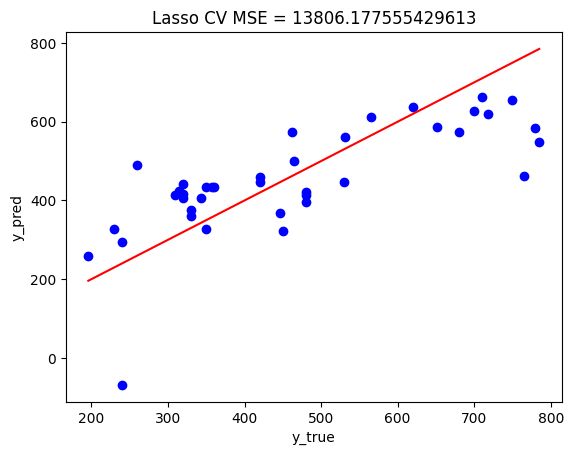

In [12]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='Lasso')

# Tree

In [13]:
tree = DecisionTreeRegressor()
params = {
    'max_depth': [2, 3, 5, 7, 9, 11],
    'min_samples_leaf':[1, 2]
}

grid = GridSearchCV(tree, params, cv=lo.split(X), scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 39 folds for each of 12 candidates, totalling 468 fits
[CV 1/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 1/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-16266.877 total time=   0.0s
[CV 2/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 2/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-546.391 total time=   0.0s
[CV 3/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 3/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-1141.877 total time=   0.0s
[CV 4/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 4/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-62.016 total time=   0.0s
[CV 5/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 5/39; 1/12] END max_depth=2, min_samples_leaf=1;, score=-4952.641 total time=   0.0s
[CV 6/39; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 6/39

[CV 39/39; 4/12] END max_depth=3, min_samples_leaf=2;, score=-2164.986 total time=   0.0s
[CV 1/39; 5/12] START max_depth=5, min_samples_leaf=1...........................
[CV 1/39; 5/12] END max_depth=5, min_samples_leaf=1;, score=-14400.000 total time=   0.0s
[CV 2/39; 5/12] START max_depth=5, min_samples_leaf=1...........................
[CV 2/39; 5/12] END max_depth=5, min_samples_leaf=1;, score=-400.000 total time=   0.0s
[CV 3/39; 5/12] START max_depth=5, min_samples_leaf=1...........................
[CV 3/39; 5/12] END max_depth=5, min_samples_leaf=1;, score=-115.562 total time=   0.0s
[CV 4/39; 5/12] START max_depth=5, min_samples_leaf=1...........................
[CV 4/39; 5/12] END max_depth=5, min_samples_leaf=1;, score=-2601.000 total time=   0.0s
[CV 5/39; 5/12] START max_depth=5, min_samples_leaf=1...........................
[CV 5/39; 5/12] END max_depth=5, min_samples_leaf=1;, score=-144.000 total time=   0.0s
[CV 6/39; 5/12] START max_depth=5, min_samples_leaf=1.........

[CV 32/39; 8/12] END max_depth=7, min_samples_leaf=2;, score=-1806.250 total time=   0.0s
[CV 33/39; 8/12] START max_depth=7, min_samples_leaf=2..........................
[CV 33/39; 8/12] END max_depth=7, min_samples_leaf=2;, score=-32400.000 total time=   0.0s
[CV 34/39; 8/12] START max_depth=7, min_samples_leaf=2..........................
[CV 34/39; 8/12] END max_depth=7, min_samples_leaf=2;, score=-3481.000 total time=   0.0s
[CV 35/39; 8/12] START max_depth=7, min_samples_leaf=2..........................
[CV 35/39; 8/12] END max_depth=7, min_samples_leaf=2;, score=-12045.062 total time=   0.0s
[CV 36/39; 8/12] START max_depth=7, min_samples_leaf=2..........................
[CV 36/39; 8/12] END max_depth=7, min_samples_leaf=2;, score=-961.000 total time=   0.0s
[CV 37/39; 8/12] START max_depth=7, min_samples_leaf=2..........................
[CV 37/39; 8/12] END max_depth=7, min_samples_leaf=2;, score=-1296.000 total time=   0.0s
[CV 38/39; 8/12] START max_depth=7, min_samples_leaf=2

[CV 18/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-193600.000 total time=   0.0s
[CV 19/39; 12/12] START max_depth=11, min_samples_leaf=2........................
[CV 19/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-4993.778 total time=   0.0s
[CV 20/39; 12/12] START max_depth=11, min_samples_leaf=2........................
[CV 20/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-7921.000 total time=   0.0s
[CV 21/39; 12/12] START max_depth=11, min_samples_leaf=2........................
[CV 21/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-2970.250 total time=   0.0s
[CV 22/39; 12/12] START max_depth=11, min_samples_leaf=2........................
[CV 22/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-3025.000 total time=   0.0s
[CV 23/39; 12/12] START max_depth=11, min_samples_leaf=2........................
[CV 23/39; 12/12] END max_depth=11, min_samples_leaf=2;, score=-676.000 total time=   0.0s
[CV 24/39; 12/12] START max_depth=11, min_

GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x00000189C26FB220>,
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2]},
             scoring='neg_mean_squared_error', verbose=10)

In [14]:
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 1}

In [ ]:
# Uncomment to get model
# tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=1)

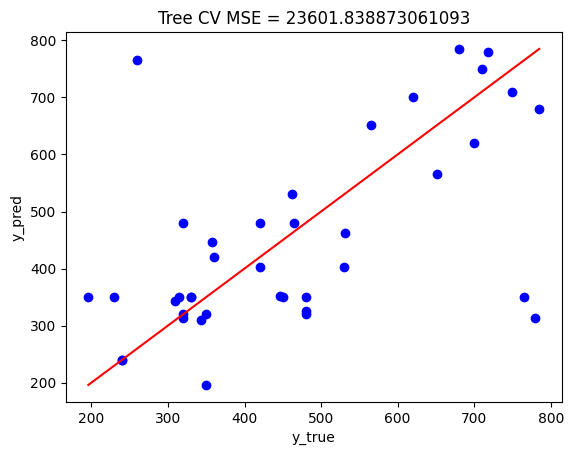

In [15]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='Tree')

# RF

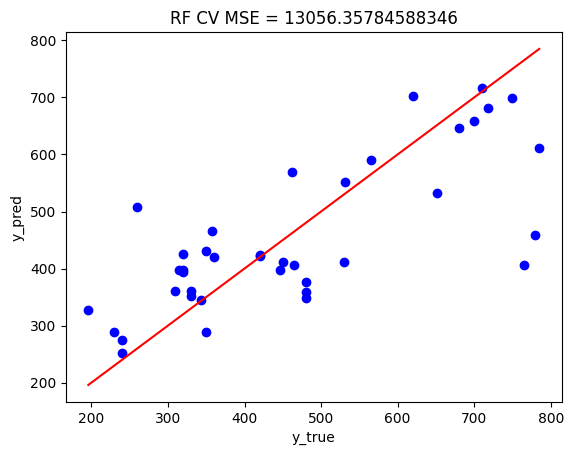

In [16]:
rf = RandomForestRegressor()
cross_validate_and_plot(rf, X, y, cv=lo, metric=mse, title='RF')

# CatBoost

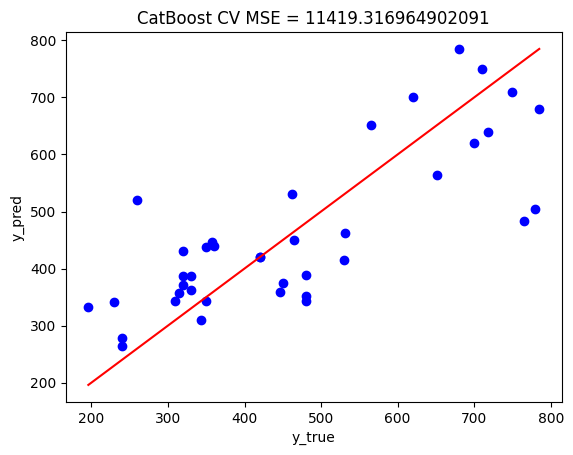

In [17]:
cb = CatBoostRegressor(verbose=0)
cross_validate_and_plot(cb, X, y, cv=lo, metric=mse, title='CatBoost')